In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.shape

(303, 14)

In [5]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
# Check for messing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
categorical_val = []
continuous_val = []
for col in df.columns:
    if len(df[col].unique()) <= 10:
        categorical_val.append(col)
    else:
        continuous_val.append(col)

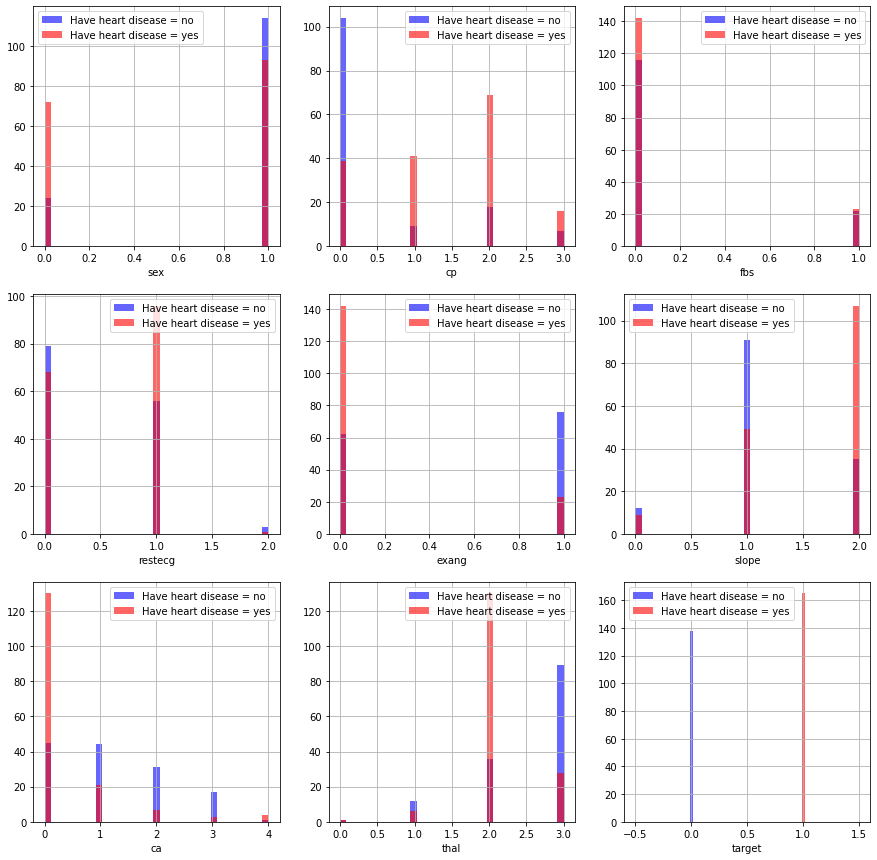

In [8]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][col].hist(bins=35, color='blue', label='Have heart disease = no', alpha=0.6)
    df[df["target"] == 1][col].hist(bins=35, color='red', label='Have heart disease = yes', alpha=0.6)
    plt.legend()
    plt.xlabel(col)

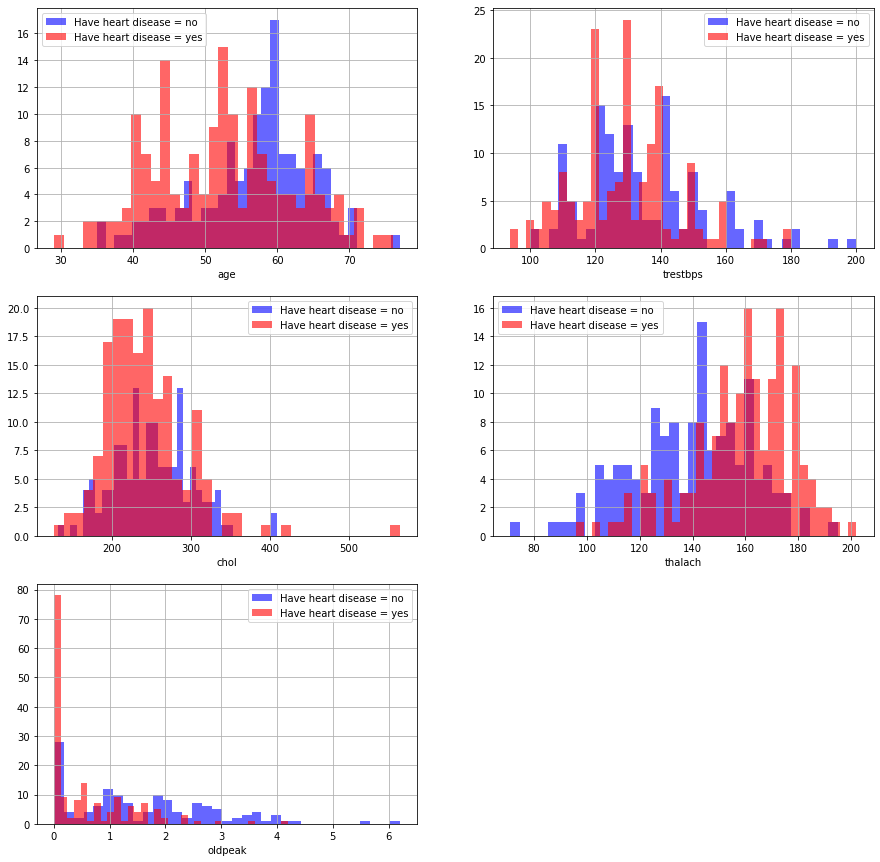

In [9]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(continuous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][col].hist(bins=35, color='blue', label='Have heart disease = no', alpha=0.6)
    df[df["target"] == 1][col].hist(bins=35, color='red', label='Have heart disease = yes', alpha=0.6)
    plt.legend()
    plt.xlabel(col)

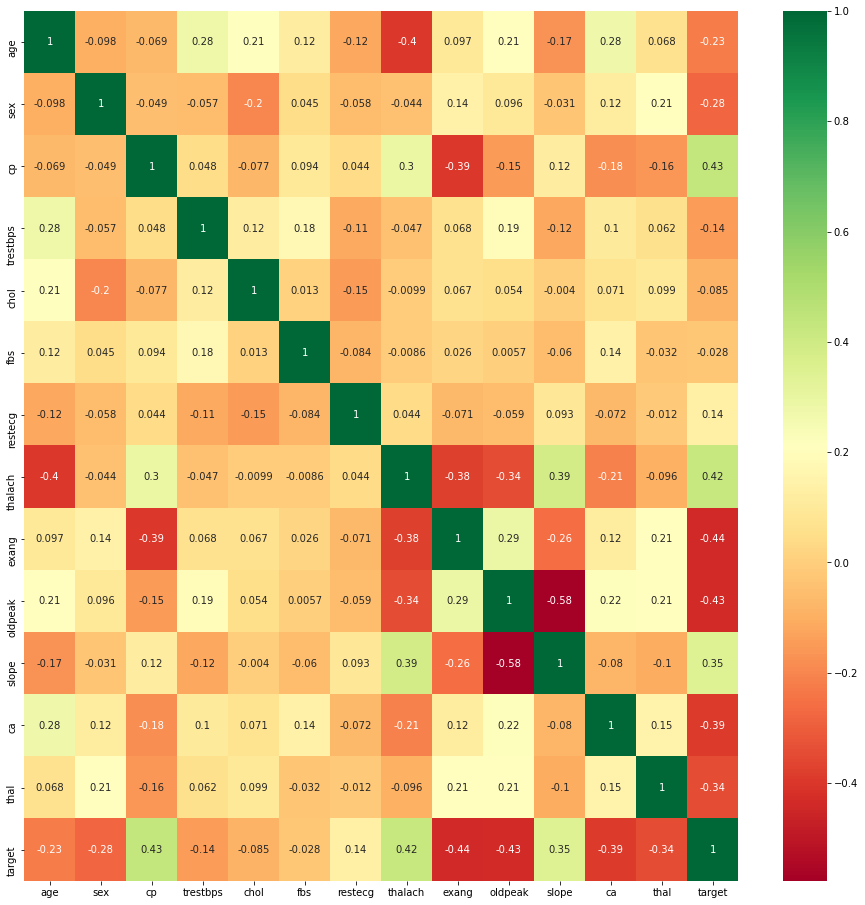

In [10]:
corr_mat = df.corr()
top_corr_features = corr_mat.index
plt.figure(figsize=(16,16))
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

<AxesSubplot:title={'center':'Correlation with target'}>

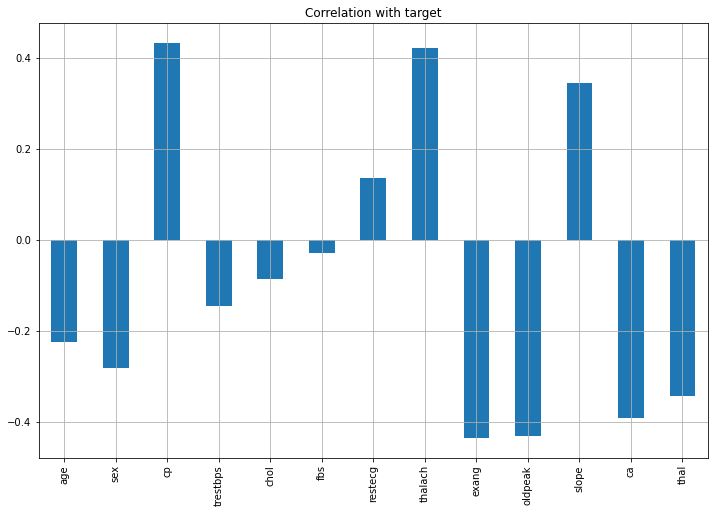

In [11]:
# Plot the corelation level between target and other parameters
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")